In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [400]:
df = pd.read_csv('data.csv')

## FEATURE ENGINEERING

In [401]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [402]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [403]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [405]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [406]:
print('Unique values:')
print('Gender:', '\n', df['Gender'].value_counts(), '\n')
print('Married:', '\n', df['Married'].value_counts(), '\n')
print('Dependents:', '\n', df['Dependents'].value_counts(), '\n')
print('Education:', '\n', df['Education'].value_counts(), '\n')
print('Self_Employed:', '\n', df['Self_Employed'].value_counts(), '\n')
print('Property_Area:', '\n', df['Property_Area'].value_counts(), '\n')
print('Loan_Status:', '\n', df['Loan_Status'].value_counts(), '\n')

Unique values:
Gender: 
 Male      489
Female    112
Name: Gender, dtype: int64 

Married: 
 Yes    398
No     213
Name: Married, dtype: int64 

Dependents: 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Education: 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Self_Employed: 
 No     500
Yes     82
Name: Self_Employed, dtype: int64 

Property_Area: 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Loan_Status: 
 Y    422
N    192
Name: Loan_Status, dtype: int64 



In [407]:
df['Gender'] = df['Gender'].fillna(value = 'Male')

In [408]:
df['Married'] = df['Married'].fillna(value = 'Yes')

In [409]:
df['Dependents'] = df['Dependents'].fillna(value = df['Dependents'].dropna().max())



In [410]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     66
Name: Dependents, dtype: int64

In [411]:
df['Self_Employed'] = df['Self_Employed'].fillna(value = 'No')

In [412]:
df['LoanAmount'] = df['LoanAmount'].fillna(value = df['LoanAmount'].mean())

In [413]:
print('Loan_Amount_Term:', '\n', df['Loan_Amount_Term'].value_counts(), '\n')

Loan_Amount_Term: 
 360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 



In [414]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(value = 360.0)

In [415]:
print('Loan_Amount_Term:', '\n', df['Loan_Amount_Term'].value_counts(), '\n')

Loan_Amount_Term: 
 360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 



In [416]:
print('Credit_History:', '\n', df['Credit_History'].value_counts(), '\n')

Credit_History: 
 1.0    475
0.0     89
Name: Credit_History, dtype: int64 



In [417]:
df['Credit_History'] = df['Credit_History'].fillna(value = 1.0)

In [418]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [419]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [420]:
from sklearn.preprocessing import LabelEncoder

In [421]:
le =LabelEncoder()

In [422]:
df['Gender'] =df['Gender'].astype(str)

In [423]:
df['Gender'] = le.fit_transform(df['Gender'])

In [424]:
df['Married'] =df['Married'].astype(str)

In [425]:
df['Married'] = le.fit_transform(df['Married'])

In [426]:
df['Education'] = le.fit_transform(df['Education'])

In [427]:
df['Self_Employed'] =df['Self_Employed'].astype(str)

In [428]:
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

In [429]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [430]:
df1 = pd.get_dummies(df['Dependents'])

In [431]:
df1.head()

,0,1,2,3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [432]:
df = pd.concat([df,df1], axis=1)

In [433]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2,3+
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,0,0,0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,0,0,0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0


In [434]:
df.drop(['Dependents'], axis =1, inplace = True)

In [435]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2,3+
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,0,0,0
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,0,0,0
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0


In [436]:
df1 = pd.get_dummies(df['Property_Area'])

In [437]:
df1.head()

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [438]:
df = pd.concat([df,df1], axis=1)

In [439]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2,3+,Rural,Semiurban,Urban
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0,0,0,1


In [440]:
df.drop(['Property_Area'], axis =1, inplace = True)

In [441]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2,3+,Rural,Semiurban,Urban
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,Y,1,0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,Y,1,0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,0,0,1


In [442]:
print('Loan_Status:', '\n', df['Loan_Status'].value_counts(), '\n')

Loan_Status: 
 Y    422
N    192
Name: Loan_Status, dtype: int64 



In [443]:
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [444]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2,3+,Rural,Semiurban,Urban
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,0,1


## EXPLORATORY DATA ANALYSIS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A96A6899E8>,
      dtype=object)

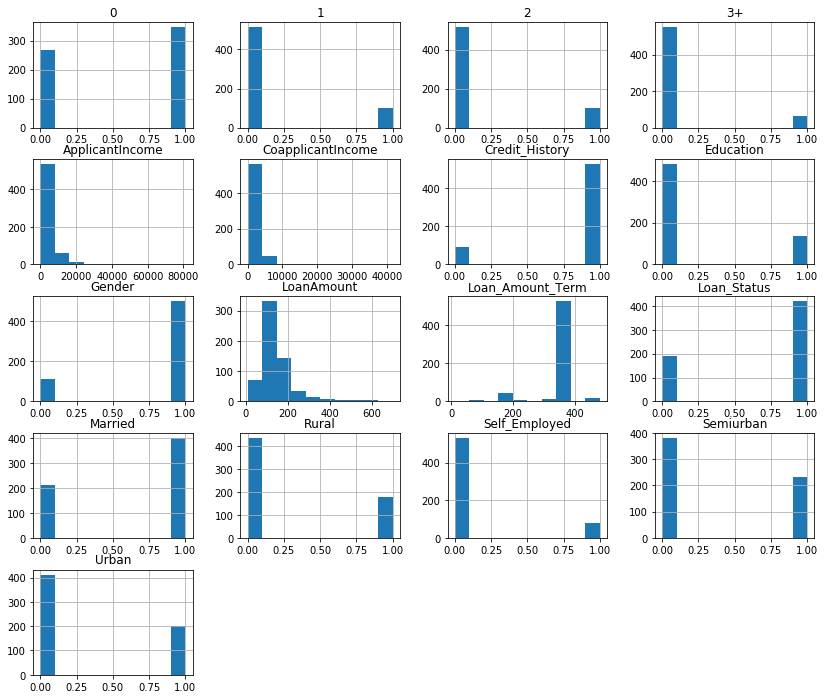

In [447]:
df.hist(figsize=(14, 12))

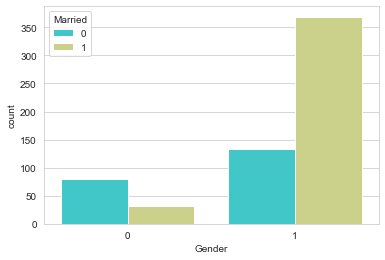

In [470]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Married',data=df,palette='rainbow')

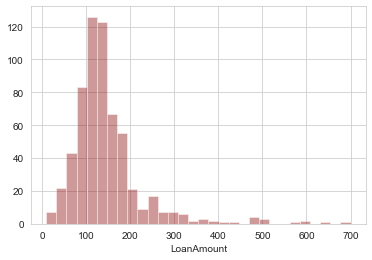

In [468]:
sns.distplot(df['LoanAmount'],kde=False,color='darkred',bins=30)

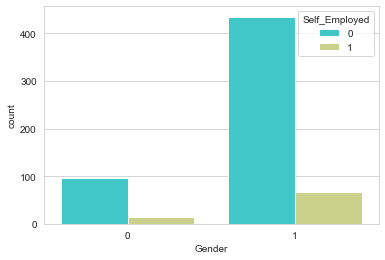

In [471]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Self_Employed',data=df,palette='rainbow')

## DATA PREPROCESSING

In [451]:
X = df.drop(['Loan_Status'], axis = 1).values
y = df['Loan_Status']

In [452]:
from sklearn.preprocessing import StandardScaler

In [453]:
sc = StandardScaler()

In [454]:
X = sc.fit_transform(X)

In [455]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (614, 16)
y shape: (614,)


## MODEL EVALUATION

In [456]:
from sklearn.model_selection import train_test_split

In [457]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)


In [458]:
from sklearn.neighbors import KNeighborsClassifier

In [460]:
kn =KNeighborsClassifier()

In [461]:
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [462]:
pred = kn.predict(X_test)

In [463]:
from sklearn.metrics import classification_report,confusion_matrix

In [464]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 28  44]
 [  9 122]]
              precision    recall  f1-score   support

           0       0.76      0.39      0.51        72
           1       0.73      0.93      0.82       131

    accuracy                           0.74       203
   macro avg       0.75      0.66      0.67       203
weighted avg       0.74      0.74      0.71       203



## ELBOW METHOD

In [465]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    pred_i = kn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

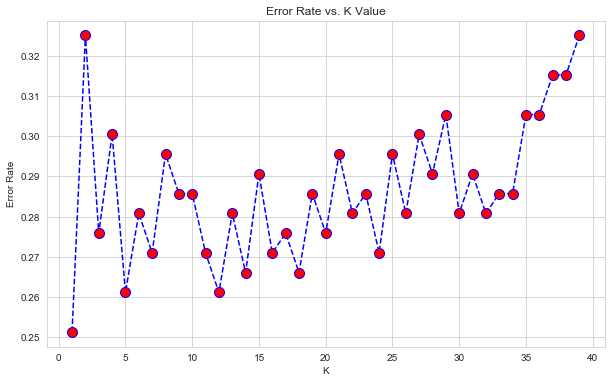

In [466]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [399]:
kn = KNeighborsClassifier(n_neighbors=1)

kn.fit(X_train,y_train)
pred = kn.predict(X_test)

print('WITH K_nearest_neighbours=1:')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K_nearest_neighbours=1:


[[ 38  34]
 [ 17 114]]


              precision    recall  f1-score   support

           0       0.69      0.53      0.60        72
           1       0.77      0.87      0.82       131

    accuracy                           0.75       203
   macro avg       0.73      0.70      0.71       203
weighted avg       0.74      0.75      0.74       203



In [477]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [474]:
models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Extra Trees', ExtraTreesClassifier()),
        ('XGboost', GradientBoostingClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('SVC', SVC()),
        ('AdaBoost', AdaBoostClassifier())
 
         ]

In [478]:

for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(name, 'Accuracy:', metrics.accuracy_score(y_test, predictions))

C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto

Logistic Regression Accuracy: 0.7980295566502463
Decision Tree Accuracy: 0.6945812807881774
Random Forest Accuracy: 0.7684729064039408
Extra Trees Accuracy: 0.729064039408867
XGboost Accuracy: 0.7487684729064039
Naive Bayes Accuracy: 0.7980295566502463
SVC Accuracy: 0.7931034482758621
AdaBoost Accuracy: 0.7931034482758621
